In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
import jax.numpy as jnp
from jax import random, jit
from sgmcmcjax.samplers import build_sgld_sampler
#jax.tree_util.tree_map()

/mnt/lustre/shared_conda/envs/sgreen/PyCBCandOptuna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# define model in JAX
def loglikelihood(theta, x):
    return -0.5*jnp.dot(x-theta, x-theta)

def logprior(theta):
    return -0.5*jnp.dot(theta, theta)*0.01


In [5]:
# generate dataset
N, D = 10000, 100
key = random.PRNGKey(0)
X_data = random.normal(key, shape=(N, D))
print(jnp.shape(X_data))

(10000, 100)


In [6]:
# build sampler
batch_size = int(0.1*N)
dt = 1e-5
my_sampler = build_sgld_sampler(dt, loglikelihood, logprior, (X_data,), batch_size)

# jit the sampler
my_sampler = partial(jit, static_argnums=(1,))(my_sampler)

Running for 10,000 iterations: 100%|██████████| 10000/10000 [00:01<00:00, 9014.93it/s]

(10000, 100)
CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.12 s


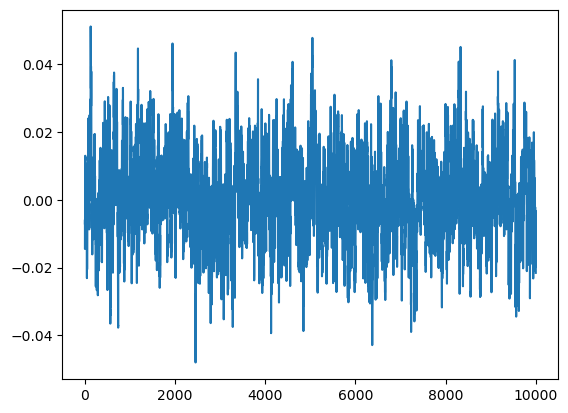

In [8]:
%%time

# run sampler
Nsamples = 10000
samples = my_sampler(key, Nsamples, jnp.zeros(D))
print(jnp.shape(samples))
idx = 0
plt.plot(samples[:, idx])
